**Open the previous challenge notebook and perform the following tasks:**

1. Subset the train dataframe to extract the numerical columns. (In this case, do not consider the popularity column.)


2. Generate a heatmap of the subset dataframe. Which feature has the highest correlation with the price column?


3. Using that feature from step. 2, build a simple linear regression model with price as the target variable. Calculate R2.


4. Add four more additional features with high correlation to the price and repeat the previous step. Observe how R2 changes. How can this change be explained?


5. Add the remaining feature and repeat the previous step. Does the model improve when the remeaning column is added as a feature?

[Previous Challenge](http://localhost:8889/notebooks/04_data_modeling/weekly_project/02_machine_learning_workflow.ipynb)

In [24]:
import pandas as pd
import numpy as np
import statsmodels.tools.eval_measures as sm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ## research this - reads a string variable as a number 
from sklearn.compose import ColumnTransformer ## works alongside the above - keeps 'under the hood'.

# machine learning stack
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./data/data_no_dupes_null.csv')
df.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,mrk_cat,size,style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# features
X = df[['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity']]

# target
y = df['price']

In [6]:
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=42)

In [7]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((6188, 15), (1547, 15), (6188,), (1547,))

In [9]:
df_train = pd.concat([Xtrain, ytrain], axis=1)
df_train.shape

(6188, 16)

In [10]:
df_train.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,mrk_cat,size,style,highway_mpg,city_mpg,popularity,price
4560,Lincoln,MKC,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,28,21,61,35720
1226,Toyota,Avalon Hybrid,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,39,40,2031,41950
3617,Dodge,Grand Caravan,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,25,17,1851,27395
3409,Lamborghini,Gallardo,2014,premium unleaded (required),570.0,10.0,MANUAL,all wheel drive,2.0,"Exotic,Factory Tuner,High-Performance",Compact,Coupe,20,13,1158,241200
1512,Mercedes-Benz,C43 AMG,1999,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Factory Tuner,Luxury,Performance",Compact,Sedan,21,16,617,4661


In [12]:
df_train.columns

Index(['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity', 'price'],
      dtype='object')

**1.** Subset the train dataframe to extract the numerical columns. (In this case, do not consider the popularity column.)

In [22]:
df_train_nums = ['year','hp', 'cylinders','doors','highway_mpg', 'city_mpg','price']
df_train[df_train_nums]

,year,hp,cylinders,doors,highway_mpg,city_mpg,price
4560,2017,240.0,4.0,4.0,28,21,35720
1226,2016,200.0,4.0,4.0,39,40,41950
3617,2015,283.0,6.0,4.0,25,17,27395
3409,2014,570.0,10.0,2.0,20,13,241200
1512,1999,302.0,8.0,4.0,21,16,4661
...,...,...,...,...,...,...,...
5226,2014,420.0,8.0,4.0,24,16,62100
5390,2009,310.0,8.0,2.0,18,13,25975
860,2016,170.0,4.0,2.0,35,24,36600
7603,2016,304.0,6.0,4.0,28,18,49250


**2.** Generate a heatmap of the subset dataframe...

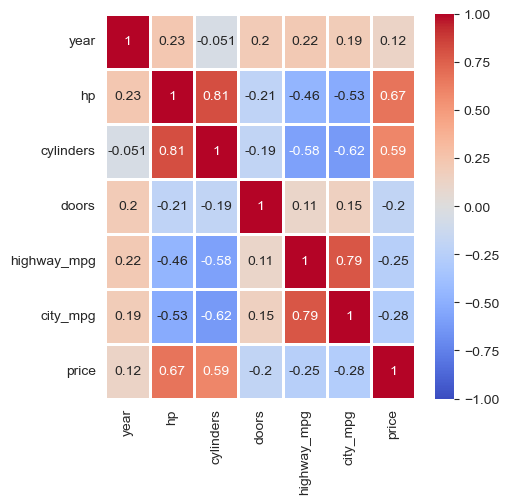

In [23]:
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(
    data=df_train[df_train_nums].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

Which feature has the highest correlation with the price column? _<ins>**hp**<ins>_

**3.** Using that feature from step. 2, build a simple linear regression model with price as the target variable. Calculate R2.

In [25]:
features = ['hp']

transformer = ColumnTransformer([('scaling', MinMaxScaler(), features)])

In [26]:
pipeline = make_pipeline(transformer, LinearRegression())

In [28]:
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['hp'])])),
                ('linearregression', LinearRegression())])

In [29]:
# training score
training_score = pipeline.score(Xtrain,ytrain)
print(f'training score: {round(training_score,6)}')

training score: 0.443051


**4.** Add four more additional features with high correlation to the price and repeat the previous step. Observe how R2 changes. How can this change be explained?

In [30]:
features = ['hp','cylinders','year']

transformer = ColumnTransformer([('scaling', MinMaxScaler(), features)])

In [31]:
pipeline = make_pipeline(transformer, LinearRegression())

In [32]:
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['hp', 'cylinders',
                                                   'year'])])),
                ('linearregression', LinearRegression())])

In [33]:
# training score
training_score = pipeline.score(Xtrain,ytrain)
print(f'training score: {round(training_score,6)}')

training score: 0.451001


**5.** Add the remaining feature and repeat the previous step. Does the model improve when the remeaning column is added as a feature?

In [37]:
features = ['hp','cylinders','year','doors','highway_mpg', 'city_mpg']

transformer = ColumnTransformer([('scaling', MinMaxScaler(), features)])

In [38]:
pipeline = make_pipeline(transformer, LinearRegression())

In [39]:
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['hp', 'cylinders', 'year',
                                                   'doors', 'highway_mpg',
                                                   'city_mpg'])])),
                ('linearregression', LinearRegression())])

In [40]:
training_score = pipeline.score(Xtrain,ytrain)
print(f'training score: {round(training_score,6)}')

training score: 0.472072
